In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from PIL import Image
from wordcloud import WordCloud
import os

In [2]:
# Đọc dữ liệu
with open("RSTPReid/data_captions.json", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data)
df.head()

,id,img_path,captions,split
0,0,0000_c14_0031.jpg,[The man is wearing a grey jacket and a blue s...,train
1,0,0000_c14_0032.jpg,[He is wearing a grey jacket with a blue shirt...,train
2,0,0000_c1_0004.jpg,[This is a man wearing a grey jacket.He is wal...,train
3,0,0000_c5_0022.jpg,[The man is walking with a black bag.He wears ...,train
4,0,0000_c7_0015.jpg,[The man is walking.He is wearing a grey jacke...,train


In [3]:
# Thống kê cơ bản
num_images = len(df)
num_captions = df['captions'].apply(len).sum()
unique_ids = df['id'].nunique()

print("Số lượng ảnh:", num_images)
print("Số lượng mô tả:", num_captions)
print("Số lượng ID:", unique_ids)
print("Số mô tả trung bình/ảnh:", num_captions / num_images)

Số lượng ảnh: 20505
Số lượng mô tả: 41010
Số lượng ID: 4101
Số mô tả trung bình/ảnh: 2.0


In [4]:
df['split'].value_counts()
df.groupby('split')['id'].nunique()

split
test      200
train    3701
val       200
Name: id, dtype: int64

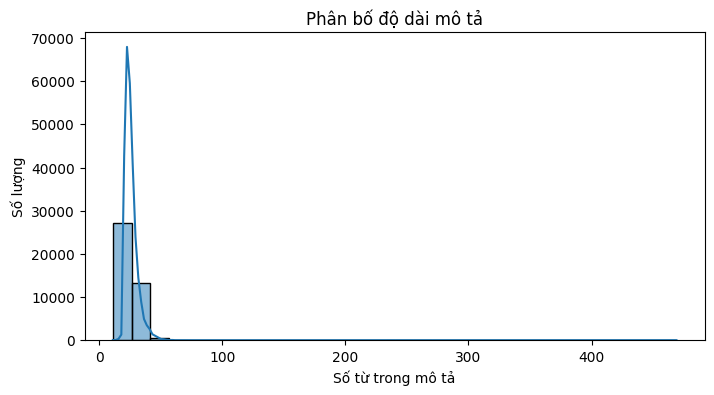

In [5]:
# Phân bố độ dài mô tả
caption_lengths = [len(c.split()) for captions in df['captions'] for c in captions]

plt.figure(figsize=(8,4))
sns.histplot(caption_lengths, bins=30, kde=True)
plt.xlabel("Số từ trong mô tả")
plt.ylabel("Số lượng")
plt.title("Phân bố độ dài mô tả")
plt.show()

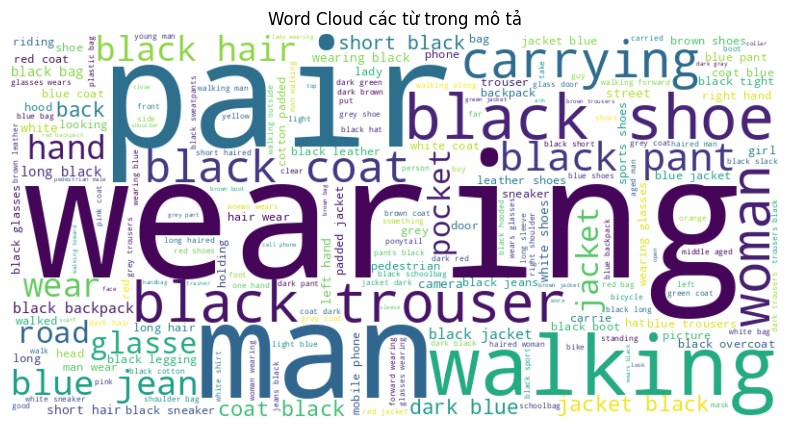

In [6]:
# Word Cloud
all_captions = " ".join([c.lower() for captions in df['captions'] for c in captions])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_captions)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud các từ trong mô tả")
plt.show()

Số lượng kích thước duy nhất: 16091
Chiều rộng: 27 → 1164 pixels
Chiều cao: 55 → 1915 pixels


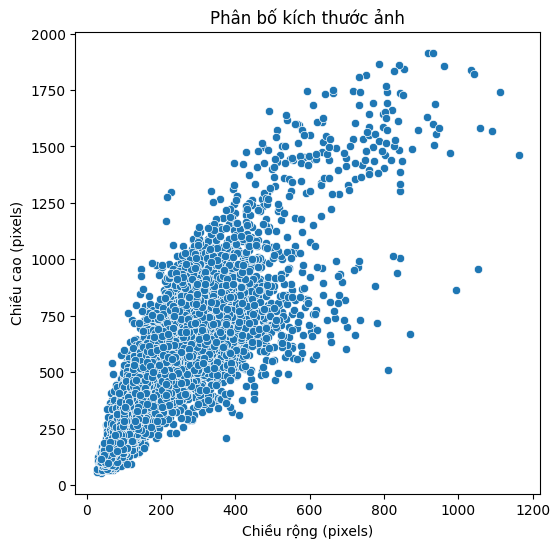

In [8]:
# Lưu kích thước ảnh
image_sizes = []

# Duyệt toàn bộ ảnh
for i in range(len(df)):
    img_path = os.path.join("RSTPReid", "imgs", df.iloc[i]['img_path'])
    with Image.open(img_path) as img:
        image_sizes.append(img.size)

# Chuyển thành DataFrame
sizes_df = pd.DataFrame(image_sizes, columns=["width", "height"])

# Thống kê cơ bản
unique_sizes = sizes_df.drop_duplicates()
width_min, width_max = sizes_df['width'].min(), sizes_df['width'].max()
height_min, height_max = sizes_df['height'].min(), sizes_df['height'].max()

print(f"Số lượng kích thước duy nhất: {len(unique_sizes)}")
print(f"Chiều rộng: {width_min} → {width_max} pixels")
print(f"Chiều cao: {height_min} → {height_max} pixels")

# Vẽ biểu đồ nếu có nhiều kích thước
if len(unique_sizes) > 1:
    plt.figure(figsize=(6,6))
    sns.scatterplot(x="width", y="height", data=sizes_df)
    plt.title("Phân bố kích thước ảnh")
    plt.xlabel("Chiều rộng (pixels)")
    plt.ylabel("Chiều cao (pixels)")
    plt.show()
else:
    print("Tất cả ảnh có cùng một kích thước, không cần vẽ biểu đồ.")